Setup Path

In [2]:
import os, sys

Project Root

In [3]:
os.chdir(r"C:/Users/samar/Desktop/Programs/Copilot-Projects/HFT-Simulator")
sys.path.append(os.getcwd())

Imports

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

Backtesting Functions

In [5]:
from python_strategies.backtests.lstm_backtest import backtest_model as lstm_backtest 
from python_strategies.backtests.rl_backtest import backtest_model as rl_backtest

Helper Functions

In [6]:
def safe_fwt(value):
    if value is None:
        return "-"
    if isInstance(value, float):
        return f"{value: .4f}"
    return str(value)

In [7]:
def print_comparison_table(lstm_report, rl_report): 
    print("\n=== Metrics Comparison Table ===") 
    print(f"{'Model':<10}{'PnL':<15}{'Sharpe':<15}{'Win Rate':<15}{'Accuracy':<15}") 
    print("-" * 70) 
    print(f"{'LSTM':<10}{safe_fmt(lstm_report['PnL']):<15}{safe_fmt(lstm_report['Sharpe Ratio']):<15}{safe_fmt(lstm_report['Win Rate']):<15}{safe_fmt(lstm_report['Accuracy']):<15}") 
    print(f"{'RL':<10}{safe_fmt(rl_report['PnL']):<15}{safe_fmt(rl_report['Sharpe Ratio']):<15}{safe_fmt(rl_report['Win Rate']):<15}{safe_fmt(rl_report['Accuracy']):<15}")

In [8]:
def plot_equity_curves(lstm_report, rl_report=None): 
    plt.figure(figsize=(10,5)) 
    plt.plot(lstm_report["equity_curve"], label="LSTM", color="blue") 
    if rl_report and "equity_curve" in rl_report: 
        plt.plot(rl_report["equity_curve"], label="RL Agent", color="red") 
    plt.xlabel("Trade Index") 
    plt.ylabel("Cumulative PnL") 
    plt.title("Backtest Equity Curves") 
    plt.legend() 
    plt.grid(True) 
    plt.show()

In [9]:
def plot_action_distribution(lstm_report, rl_report): 
    lstm_actions = Counter(lstm_report["actions"]) 
    rl_actions = Counter(rl_report["actions"]) 
    df = pd.DataFrame([lstm_actions, rl_actions], index=["LSTM", "RL"]).fillna(0) 
    df.plot(kind="bar", figsize=(8,5)) 
    plt.title("Action Distribution (BUY=2, HOLD=1, SELL=0)") 
    plt.xlabel("Model") 
    plt.ylabel("Count") 
    plt.grid(True) 
    plt.show()

Backtests Run

[INFO] Running LSTM Backtest...
Step 0, Pred=[[ 0.7679772  -1.1667312   0.31268895]], Action=0
Step 1, Pred=[[ 0.7679772  -1.1667312   0.31268895]], Action=0
Step 2, Pred=[[ 0.7679772  -1.1667312   0.31268895]], Action=0
Step 3, Pred=[[ 0.7679772  -1.1667312   0.31268895]], Action=0
Step 4, Pred=[[ 0.7679772  -1.1667312   0.31268895]], Action=0
[INFO] Action Distribution:  Counter({0: 29})
LSTM Backtest Report: {'PnL': np.float64(0.0003), 'Sharpe Ratio': np.float64(0.19120458625623343), 'Win Rate': 0.6207, 'Accuracy': 1.0, 'equity_curve': [0.0, np.float64(4.810930433945925e-05), np.float64(9.237199377901489e-05), np.float64(2.886184562710418e-05), np.float64(-3.464426924204263e-05), np.float64(-9.429774030430825e-05), np.float64(-0.00015779603450913901), np.float64(-0.00010777025199048431), np.float64(-5.389363713524626e-05), np.float64(1.910149055461347e-06), np.float64(5.771704948250836e-05), np.float64(0.00011352706449350593), np.float64(0.0001693401944361234), np.float64(0.00010967

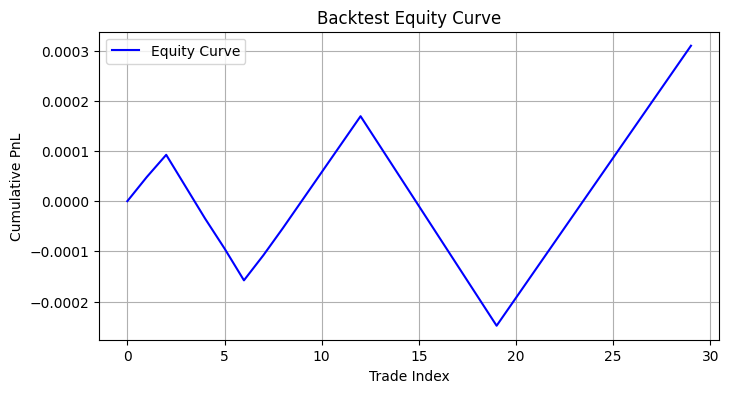

[INFO] Running RL Backtest...
RL Agent Backtest Report: {'PnL': np.float64(7.650000000005093), 'Sharpe Ratio': None, 'Win Rate': 0.5, 'Accuracy': None}


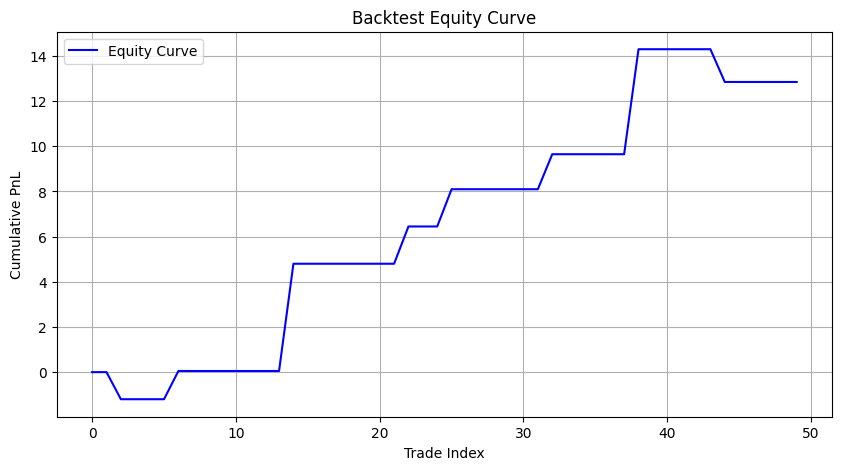

In [11]:
csv_path = "data_feed/raw_data/btc_usdt.csv" 
lstm_model_path = "python_strategies/models/lstm_model.pt"

print("[INFO] Running LSTM Backtest...") 
lstm_report = lstm_backtest(csv_path, lstm_model_path)

print("[INFO] Running RL Backtest...") 
rl_report = rl_backtest(csv_path)

Display Comparison Table

In [15]:
print_comparison_table(lstm_report, rl_report)



=== Metrics Comparison Table ===
Model     PnL            Sharpe         Win Rate       Accuracy       
----------------------------------------------------------------------
LSTM      0.0003         0.1912         0.6207         1.0000         
RL        7.6500         —              0.5000         —              
